In [4]:
import glob
import os
import mne
import matplotlib.pyplot as plt

In [11]:
def get_subjects():
    path = f"release1/"
    subject_files = glob.glob(os.path.join(path, "sub*"))
    return subject_files

Extracting EDF parameters from /Users/carinaxguo/ESE 5380/eeg_challenge/release1/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-contrastChangeDetection_run-1_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


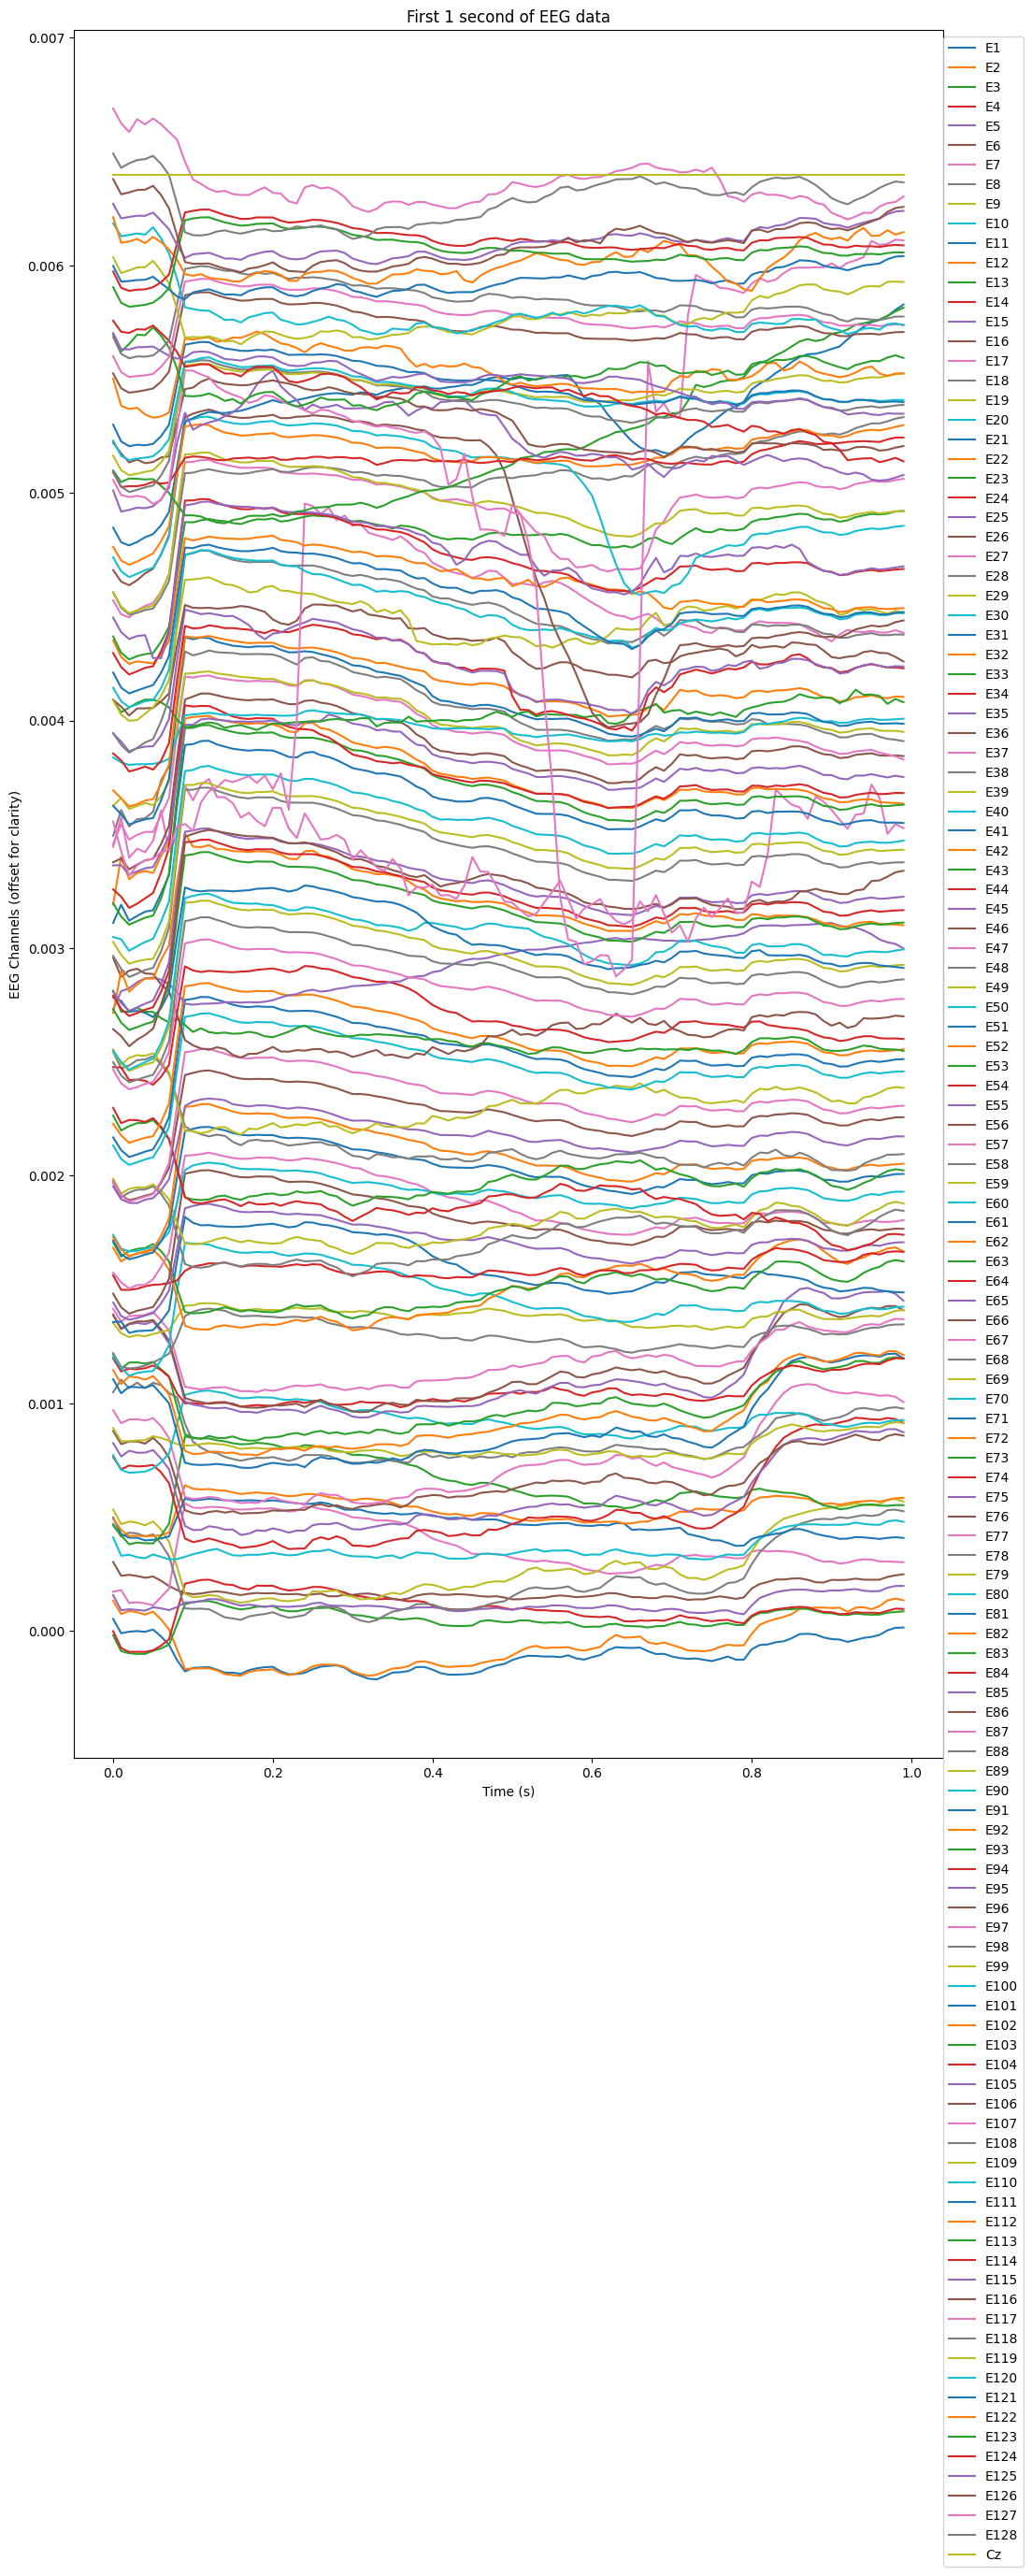

In [15]:
subject_temp = "sub-NDARAC904DMU"
bdfs = get_bdfs_for_subject(subject_temp)


bdf_path = "release1/sub-NDARAC904DMU/eeg/sub-NDARAC904DMU_task-contrastChangeDetection_run-1_eeg.bdf"
raw = mne.io.read_raw_bdf(bdf_path, preload=False)
raw.pick_types(eeg=True, eog=True)
sfreq = raw.info["sfreq"]

data, times = raw.get_data(start=0, stop=int(sfreq), return_times=True)

plt.figure(figsize=(12, 24))
for i in range(data.shape[0]):
    plt.plot(times, data[i] + i*50e-6, label=raw.ch_names[i])

plt.title("First 1 second of EEG data")
plt.xlabel("Time (s)")
plt.ylabel("EEG Channels (offset for clarity)")
plt.legend(loc="upper right", bbox_to_anchor=(1.1, 1.0))
plt.show()
